In [1]:
from math import factorial, log
import matplotlib.pyplot as plt

In [2]:
def plot(xs, ys, title=None, xlabel=None, ylabel=None):
    plt.figure(figsize=(10,5))
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.ylim((0.9, 1.0))
    plt.plot(xs, ys)
    plt.show()

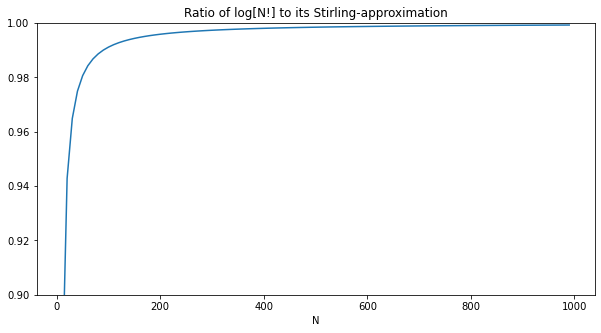

In [3]:
# numerical verification of Stirling's approximation for large N

def log_factorial(N):
    # compute log(N!) as a sum, so we can compute if for large N
    # this is not an approximation, aside from floating point issues
    sum = 0
    for i in range(1, N+1):
        sum += log(i)
    return sum
    
def stirling(N):
    return N*log(N)-N

xs, ys = [], []
for N in range(10, 1000, 10):
    xs.append(N)
    ys.append(stirling(N)/log_factorial(N))
plot(xs, ys, title='Ratio of log[N!] to its Stirling-approximation', xlabel='N')

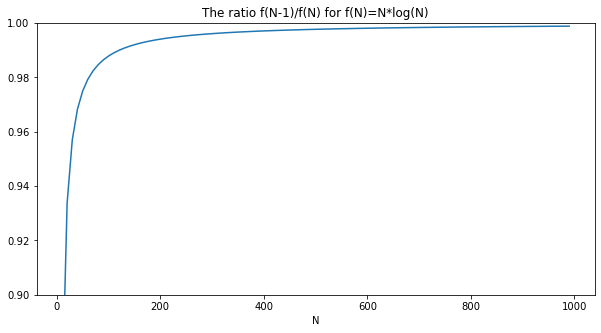

In [4]:
# numerical verification that (N-1)*log(N-1) ~ N*log(N) for large N

def f(N):
    return N*log(N)

xs, ys = [], []
for N in range(10, 1000, 10):
    xs.append(N)
    ys.append(f(N-1)/f(N))
plot(xs, ys, title='The ratio f(N-1)/f(N) for f(N)=N*log(N)', xlabel='N')

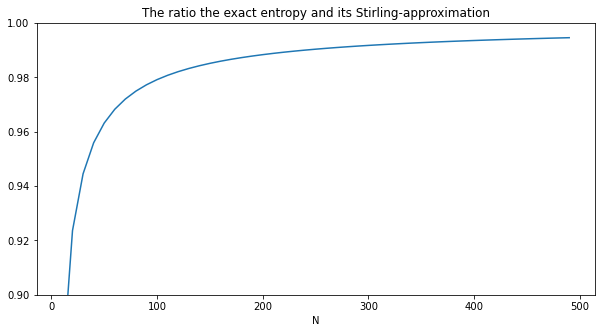

In [5]:
# numerical verification that the exact entropy S and its
# Stirling-approximated are the same for large N

def W(N, M):
    return factorial(N+M-1) / (factorial(N)*factorial(M-1))

def S(N, M):
    return log(W(N,M))

def S_stirling(N, M):
    return (N+M-1)*log(N+M-1) - (M-1)*log(M-1) - N*log(N)

xs, ys = [], []
for N in range(10, 500, 10):
    xs.append(N)
    ys.append(S(N, N)/S_stirling(N, N))
plot(xs, ys, title='The ratio the exact entropy and its Stirling-approximation', xlabel='N')

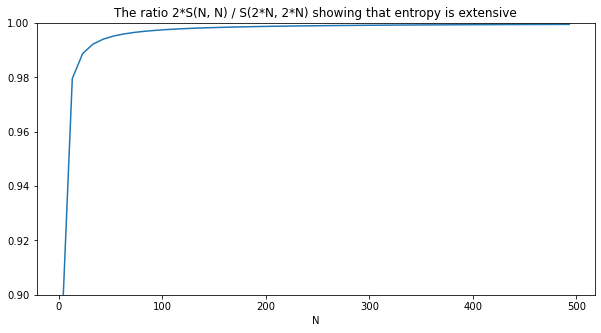

In [6]:
# numerical verification that entropy is extensive

def S_stirling(N, M):
    return (N+M-1)*log(N+M-1) - (M-1)*log(M-1) - N*log(N)

xs, ys = [], []
for N in range(3, 500, 10):
    xs.append(N)
    ys.append(2*S_stirling(N, N) / S_stirling(2*N, 2*N))
plot(xs, ys, title='The ratio 2*S(N, N) / S(2*N, 2*N) showing that entropy is extensive', xlabel='N')